In [82]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [83]:
dcdf = pd.read_table('candidate_objects.dat', names=['field',
'candidate id',
'object id',
'object ra', 
'object dec', 
'object MJD', 
'object filter', 
'object magnitude', 
'object magnitude error', 
'object real/bogus score', 
'exposure id'], comment='#', delim_whitespace=True)

dcdf

,field,candidate id,object id,object ra,object dec,object MJD,object filter,object magnitude,object magnitude error,object real/bogus score,exposure id
0,COSMOS,DC21jyeo,1244336,148.627940,1.020521,59360.983202,g,21.359,0.084,0.956,1107
1,COSMOS,DC21jyeo,1244619,148.628248,1.020494,59360.984455,g,21.596,0.110,0.612,1108
2,COSMOS,DC21jvtr,1231065,148.394095,1.407216,59358.011504,g,18.943,0.009,1.000,1059
3,COSMOS,DC21jvtr,1232660,148.394358,1.407301,59358.012786,g,18.932,0.010,0.998,1060
4,COSMOS,DC21jvtr,1233917,148.394618,1.407363,59358.014054,r,18.440,0.005,1.000,1061
...,...,...,...,...,...,...,...,...,...,...,...
5663,ELAIS,DC21dreor,11448783,8.446305,-43.034973,59546.207082,g,22.297,0.073,0.924,5377
5664,ELAIS,DC22dvrhc,11563818,8.768651,-44.225484,59572.079390,g,22.786,0.083,0.967,5858
5665,ELAIS,DC22dvrhc,11572433,8.768626,-44.225219,59572.104555,g,22.809,0.090,0.682,5876
5666,ELAIS,DC22dvris,11563888,8.292958,-44.349343,59572.079390,g,22.893,0.096,0.598,5858


In [84]:
dcdf.shape

(5668, 11)

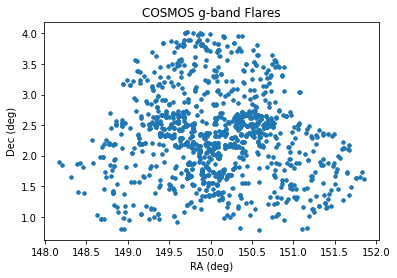

In [85]:
ra = dcdf[(dcdf['field'] == 'COSMOS') & (dcdf['object filter'] == 'g')]['object ra']
dec = dcdf[(dcdf['field'] == 'COSMOS') & (dcdf['object filter'] == 'g')]['object dec']

plt.scatter(ra, dec, s=10)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('COSMOS g-band Flares');

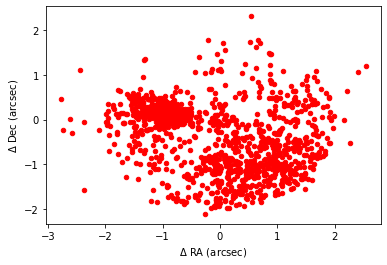

In [81]:
def dcoord(thr, filt):

        d_ra = np.zeros_like(dcdf['candidate id'].unique())
        d_dec = np.zeros_like(dcdf['candidate id'].unique())  

        for i,id in enumerate(dcdf['candidate id'].unique()):
                #print('Candidate ID: {}'.format(id))
                #print(dcdf[(dcdf['object filter'] == filt) & 
                #        (dcdf['object real/bogus score'] > thr) & (dcdf['candidate id'] == id)][['object MJD', 'object ra', 'object dec']])

                d_ra[i] = dcdf[(dcdf['object filter'] == filt) & 
                        (dcdf['object real/bogus score'] > thr) & (dcdf['candidate id'] == id)]['object ra'].values[0] - dcdf[(dcdf['object filter'] == filt) & 
                        (dcdf['object real/bogus score'] > thr) & (dcdf['candidate id'] == id)]['object ra'].values[1]

                d_dec[i] = dcdf[(dcdf['object filter'] == filt) & 
                        (dcdf['object real/bogus score'] > thr) & (dcdf['candidate id'] == id)]['object dec'].values[0] - dcdf[(dcdf['object filter'] == filt) & 
                        (dcdf['object real/bogus score'] > thr) & (dcdf['candidate id'] == id)]['object dec'].values[1]

                #print(d_ra*3600, d_dec*3600)
        plt.scatter(d_ra*3600, d_dec*3600, color='red', s=20)

plt.xlabel(r'$\Delta$ RA (arcsec)')
plt.ylabel(r'$\Delta$ Dec (arcsec)')

dcoord(0.0, 'g')